# Introduction to Happywhale competition

We can have a first look at the [data](https://www.kaggle.com/c/happy-whale-and-dolphin/data) using the data explorer of Kaggle. We can see that images have different qualities ranging from a dorsal fin to a distant view of the back of the mammal.

Let’s have a more complete view. First add the data through the Kaggle UI. They are afterwards located in */kaggle/input/happy-whale-and-dolphin* folder.

In [8]:
!ls -l /kaggle/input/happy-whale-and-dolphin

total 4668
-rw-r--r-- 1 nobody nogroup 2404234 Feb  1 16:49 sample_submission.csv
drwxr-xr-x 2 nobody nogroup       0 Feb  1 16:51 test_images
-rw-r--r-- 1 nobody nogroup 2371769 Feb  1 16:51 train.csv
drwxr-xr-x 2 nobody nogroup       0 Feb  1 16:57 train_images


## Data loading

Let’s load the images metadata described in `train.csv` file. 

In [13]:
import pandas as pd
df = pd.read_csv("/kaggle/input/happy-whale-and-dolphin/train.csv")
df

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392
...,...,...,...
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e


We can notice that our train data describes 51 033 images with one ID field for the photography filename and 2 others fields. The latter describe the animal specy and which individual it is.

## Counting images per individual

In [46]:
individuals = df.drop(columns = ['species']).groupby(['individual_id']).count().rename(columns = { 'image': 'images_count'})
individuals

,images_count
individual_id,
0013f1f5f2f0,1
001618e0a31e,1
0018a0f40586,1
00191b9a2f6f,1
001a09e48b2d,4
...,...
fff35b58c591,1
fff591b41cce,4
fffb11ff4575,4


In [49]:
individuals.describe()

,images_count
count,15587.000000
mean,3.274075
std,9.242430
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,400.000000


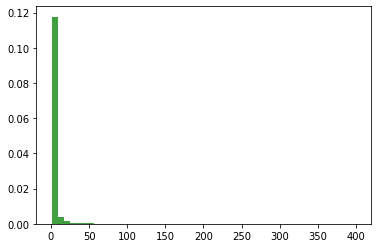

In [53]:
from matplotlib import pyplot as plt
plt.hist(individuals.images_count, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

The 51 033 pictures describe 15 887 individuals. The distribution is very skewed:
- 75% of individuals have only one or two pictures
- 400 pictures are dedicated to only one individual

## Counting images per specy

In [52]:
species = df.drop(columns = ['individual_id']).groupby(['species']).count().rename(columns = { 'image': 'images_count'})
print(species.shape)
species

(30, 1)


,images_count
species,
beluga,7443
blue_whale,4830
bottlenose_dolphin,9664
bottlenose_dolpin,1117
brydes_whale,154
commersons_dolphin,90
common_dolphin,347
cuviers_beaked_whale,341
dusky_dolphin,3139


In [55]:
species.describe()

,images_count
count,30.000000
mean,1701.100000
std,2480.322273
min,14.000000
25%,231.250000
50%,678.000000
75%,1668.750000
max,9664.000000


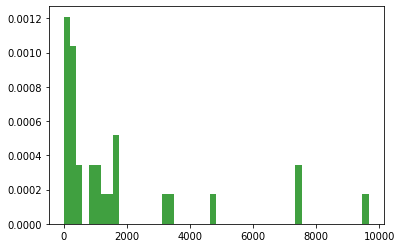

In [54]:
plt.hist(species.images_count, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

The 51 887 images describe 30 species. Again, the distribution is skewed. Frasiers dolphin specy is descibed by only 14 images, while Bottle nose dolphin (9664) and blue whale (4830) are over represented.

## Species and individuals description

So, all together, data contains 51 033 images of 15 587 individuals from 30 species.

Whales are a species included in the *Cetacea* infraorder.
Dolphin are a species included in the *Cetacea* infraorder and the *Delphinidae* superfamily.
Beluga, or more commonly called **white whale**, is a specy from the *Cetacea* infraorder and the *Delphinidae* superfamily.
Globis, or more commonly called **pilot whale**, is a specy from the *Cetacea* infraorder and the *Delphinidae* superfamily.